<a href="https://colab.research.google.com/github/sathvik044/LDA/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and Standardizing Data...

Training LDA and Logistic Regression Models...

Evaluating Models...

LDA Model Performance:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Logistic Regression Model Performance:
Accuracy: 0.9815, Precision: 0.9827, Recall: 0.9815, F1 Score: 0.9816
Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


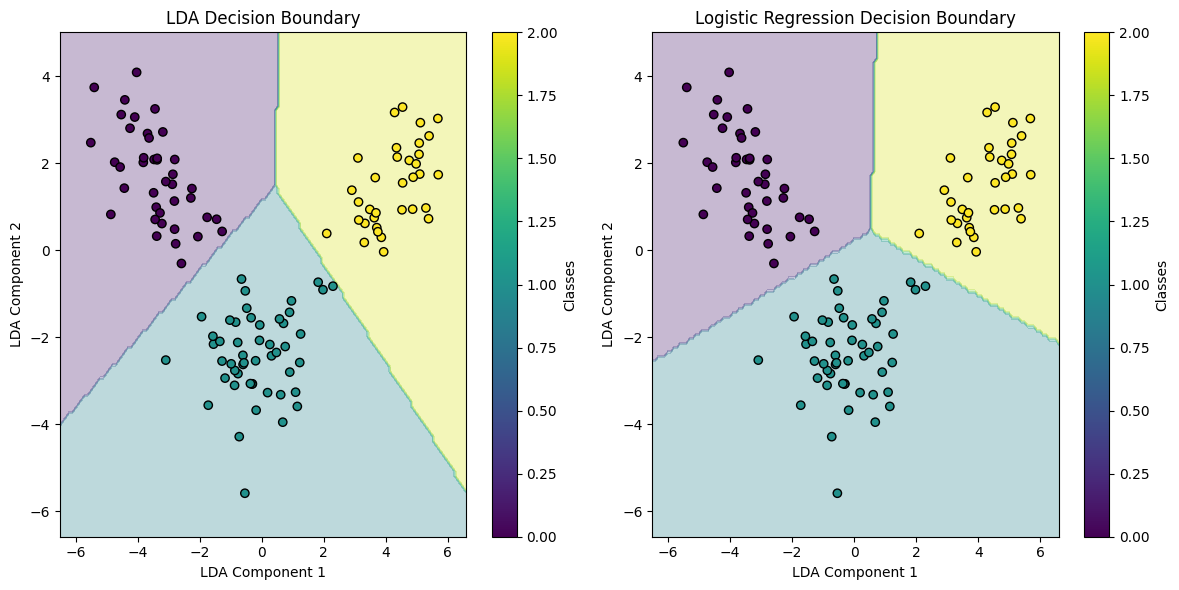


Summary and Observations:
1. LDA tends to perform well with normally distributed classes, providing clear separation.
2. Logistic Regression does not assume normality and handles varied data structures flexibly.
3. Decision boundary visualization highlights differences in class separation ability.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def wine_classification_lda_vs_logistic():
    # Step 1: Load and Standardize Data
    print("Loading and Standardizing Data...")
    data = load_wine()
    X, y = data.data, data.target

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardizing the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 2: Train LDA and Logistic Regression Models
    print("\nTraining LDA and Logistic Regression Models...")
    # LDA Model
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train_scaled, y_train)

    # Logistic Regression Model
    logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
    logistic_model.fit(X_train_scaled, y_train)

    # Step 3: Define Model Evaluation Function
    def evaluate_model(model, X, y_true):
        y_pred = model.predict(X)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_true, y_pred)
        report = classification_report(y_true, y_pred)

        return accuracy, precision, recall, f1, conf_matrix, report

    # Evaluate models and print results
    print("\nEvaluating Models...")
    lda_metrics = evaluate_model(lda_model, X_test_scaled, y_test)
    logistic_metrics = evaluate_model(logistic_model, X_test_scaled, y_test)

    # Display metrics for both models
    print("\nLDA Model Performance:")
    print(f"Accuracy: {lda_metrics[0]:.4f}, Precision: {lda_metrics[1]:.4f}, Recall: {lda_metrics[2]:.4f}, F1 Score: {lda_metrics[3]:.4f}")
    print("Confusion Matrix:\n", lda_metrics[4])
    print("Classification Report:\n", lda_metrics[5])

    print("\nLogistic Regression Model Performance:")
    print(f"Accuracy: {logistic_metrics[0]:.4f}, Precision: {logistic_metrics[1]:.4f}, Recall: {logistic_metrics[2]:.4f}, F1 Score: {logistic_metrics[3]:.4f}")
    print("Confusion Matrix:\n", logistic_metrics[4])
    print("Classification Report:\n", logistic_metrics[5])

    # Step 4: Visualize Decision Boundaries (Reduced to 2D with LDA)
    def plot_decision_boundaries_2d(X, y, models, model_labels):
        # Project data to 2D using LDA for visualization
        lda_2d = LinearDiscriminantAnalysis(n_components=2)
        X_2d = lda_2d.fit_transform(X, y)

        # Create mesh grid
        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        plt.figure(figsize=(12, 6))

        for idx, (model, title) in enumerate(zip(models, model_labels)):
            plt.subplot(1, 2, idx + 1)
            model_in_2d = model.__class__(**model.get_params())
            model_in_2d.fit(X_2d, y)

            Z = model_in_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.3)

            # Scatter plot with the 2D-projected training points
            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
            plt.colorbar(scatter, label='Classes')
            plt.title(f'{title} Decision Boundary')
            plt.xlabel('LDA Component 1')
            plt.ylabel('LDA Component 2')

        plt.tight_layout()
        plt.show()

    # Step 5: Plot Decision Boundaries for Visual Comparison
    print("\nPlotting Decision Boundaries...")
    plot_decision_boundaries_2d(X_train_scaled, y_train, [lda_model, logistic_model], ["LDA", "Logistic Regression"])

    # Step 6: Summary and Key Observations
    print("\nSummary and Observations:")
    print("1. LDA tends to perform well with normally distributed classes, providing clear separation.")
    print("2. Logistic Regression does not assume normality and handles varied data structures flexibly.")
    print("3. Decision boundary visualization highlights differences in class separation ability.")

if __name__ == "__main__":
    wine_classification_lda_vs_logistic()
